In [29]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sb


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [30]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [31]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

C:\Users\Gagan\AppData\Local\Temp\ipykernel_2332\694922604.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)


In [32]:
df.head() 

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [33]:
x = df.iloc[:,1:3]
y=df.iloc[:,0]

In [34]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

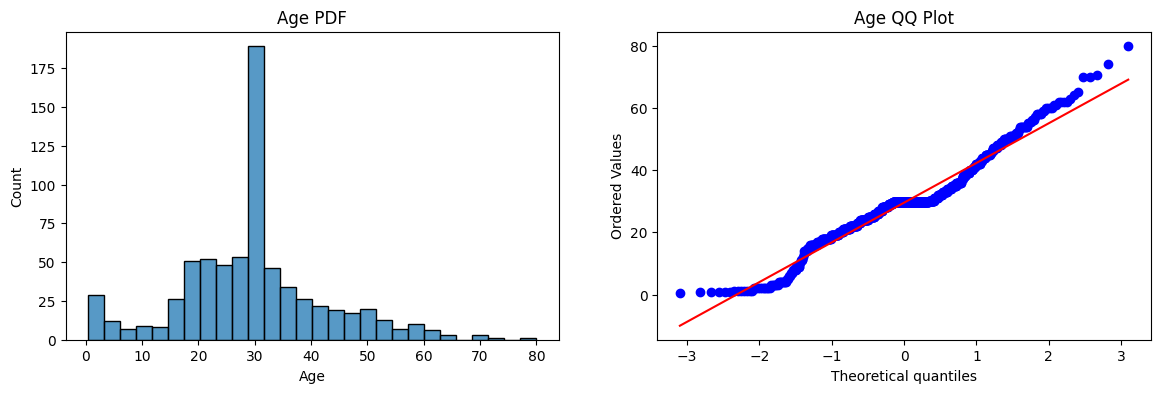

In [35]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sb.histplot(x_train['Age'])
plt.title('Age PDF')


plt.subplot(122)
stats.probplot(x_train['Age'],dist="norm",plot=plt)
plt.title('Age QQ Plot')


plt.show()

Text(0.5, 1.0, 'Fare QQ Plot')

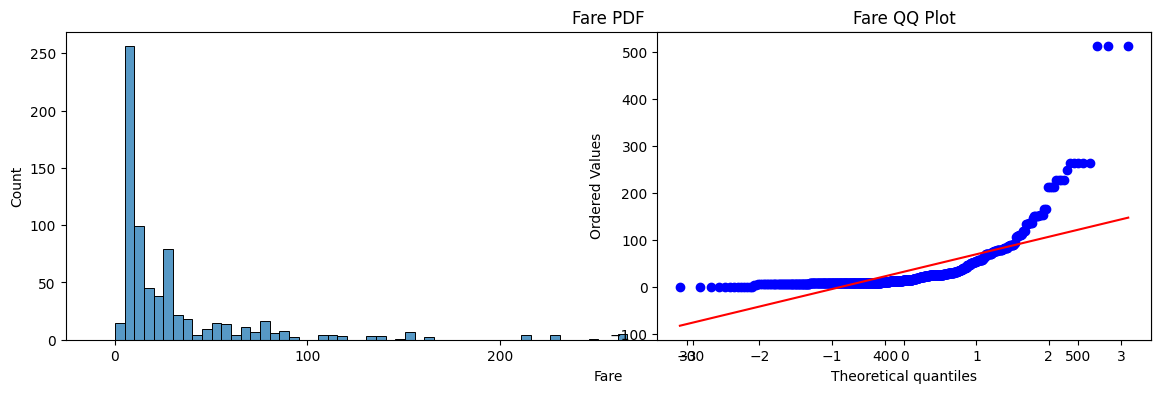

In [36]:
plt.figure(figsize=(14,4))
sb.histplot(x_train['Fare'])
plt.title("Fare PDF")


plt.subplot(122)
stats.probplot(x_train['Fare'],dist='norm',plot=plt)
plt.title("Fare QQ Plot")


In [37]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [38]:
clf.fit(x_train,y_train)
clf2.fit(x_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [39]:
ypredd = clf.predict(x_test)
ypred2 = clf2.predict(x_test)

In [40]:
print("Accuracy of Logistic Regress. : ",accuracy_score(y_test,ypredd))
print("Accuracy of Decision Classifier. : ",accuracy_score(y_test,ypred2))


Accuracy of Logistic Regress. :  0.6480446927374302
Accuracy of Decision Classifier. :  0.664804469273743


In [ ]:
trf = FunctionTransformer(func=np.log1p)          #use this fxn for transformer 

In [57]:
x_train_trf = trf.fit_transform(x_train)     # training the data 
x_test_trf  = trf.fit_transform(x_test)

In [58]:
clf = LogisticRegression()  #models of scikit learn
clf2 = DecisionTreeClassifier()


In [59]:
clf.fit(x_train_trf,y_train)           # logisitc Regression
clf2.fit(x_train_trf,y_train)                           # Decision Transformer

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [60]:
ypre = clf.predict(x_test)
ypre2 = clf.predict(x_test)


In [62]:
print("Accuracy of Logistic Regress. : ",accuracy_score(y_test,ypre))
print("Accuracy of Decision Classifier. : ",accuracy_score(y_test,ypre2))


Accuracy of Logistic Regress. :  0.7374301675977654
Accuracy of Decision Classifier. :  0.7374301675977654


In [63]:
x_transformed = trf.fit_transform(x)

In [64]:
clf = LogisticRegression()  
clf2 = DecisionTreeClassifier()

In [67]:
print("LR:",np.mean(cross_val_score(clf,x_transformed,y,scoring='accuracy',cv=10)))
print("DT:",np.mean(cross_val_score(clf2,x_transformed,y,scoring='accuracy',cv=10)))

LR: 0.678027465667915
DT: 0.6543695380774032
